# Bagging Tree Classifier

In [1]:
# Load Breast Cancer Data Set
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
print(X.shape,y.shape)

(569, 30) (569,)


Feature ranking:
1. feature 27 (0.123613)
2. feature 20 (0.102393)
3. feature 23 (0.090718)
4. feature 22 (0.073362)
5. feature 7 (0.069074)
6. feature 0 (0.057682)
7. feature 2 (0.057616)
8. feature 6 (0.055987)
9. feature 3 (0.052329)
10. feature 26 (0.042248)
11. feature 25 (0.027331)
12. feature 21 (0.024081)
13. feature 1 (0.023992)
14. feature 13 (0.023794)
15. feature 12 (0.021898)
16. feature 24 (0.019354)
17. feature 10 (0.017798)
18. feature 5 (0.017481)
19. feature 28 (0.014939)
20. feature 4 (0.011544)
21. feature 29 (0.010375)
22. feature 17 (0.009089)
23. feature 16 (0.008688)
24. feature 15 (0.007596)
25. feature 8 (0.007226)
26. feature 9 (0.006757)
27. feature 18 (0.006067)
28. feature 19 (0.005820)
29. feature 14 (0.005708)
30. feature 11 (0.005441)


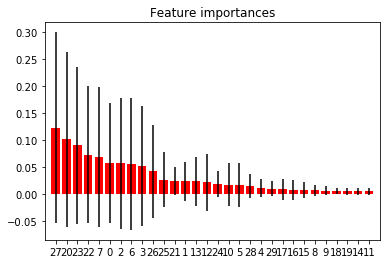

In [2]:
# print out the important features 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [4]:
# Create the model and fit the data
from sklearn.ensemble import BaggingClassifier

n_estimators = [10,20,50,80,100,200]
oob_errors = []


for n in n_estimators:
    bag_cls = BaggingClassifier(base_estimator=None, n_estimators=n,
                     max_samples=1.0, max_features=1.0, bootstrap=True,
                     bootstrap_features=False, oob_score=True, 
                     warm_start=False, n_jobs=6, random_state=1, verbose=1)
    bag_cls.fit(X_train,y_train)
    #y_pred = bag_reg.predict(X_test)
    oob_errors.append(bag_cls.oob_score_)
    

[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.8s remaining:    1.7s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    1.6s finished
D:\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.9s remaining:    1.9s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    2.0s finished
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.8s remaining:    1.7s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    1.9s finished
[Parallel(n_jobs=6)]: Done   2 out of   6 | elapsed:    0.9s remaining:    1.9s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    1.7s f

In [5]:
print(oob_errors)


[0.92723004694835676, 0.93896713615023475, 0.9460093896713615, 0.94835680751173712, 0.94835680751173712, 0.95539906103286387]


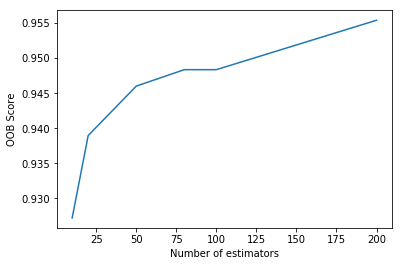

In [6]:
# plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(n_estimators,oob_errors)
plt.xlabel("Number of estimators")
plt.ylabel("OOB Score")
plt.show()



![Ensemble Learning](Bagging_classification.jpg)


In [7]:
# Majority Voting with different classfiers

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

lgr = LogisticRegression(random_state = 1)
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors = 5)

eclf1 = VotingClassifier(estimators=[('lr', lgr), ('gnb', gnb), ('knn', knn)], voting='hard')
eclf2 = VotingClassifier(estimators=[('lr', lgr), ('gnb', gnb), ('knn', knn)], voting='soft')




In [8]:
eclf1.fit(X,y)
eclf1.score(X,y)

0.96485061511423553

In [9]:
eclf2.fit(X,y)
eclf2.score(X,y)

0.96660808435852374